SVM result for plain text tweets

In [6]:
import sys
sys.path.append('../utils')
from dataset_split_tfidf import load_and_split_data

X_train, X_test, y_train, y_test = load_and_split_data()

In [7]:
import joblib
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# train SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# evaluate the model
y_pred = svm_model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))
# save the model
joblib.dump(svm_model, './tfidf_models/svm_model.pkl')


In [ ]:
import joblib
from sklearn.metrics import classification_report, accuracy_score

# load the model
svm_model = joblib.load('./tfidf_models/svm_model.pkl')

# predict
y_pred = svm_model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

Accuracy: 0.6410977242302544
              precision    recall  f1-score   support

    negative       0.65      0.45      0.53      8259
     neutral       0.61      0.81      0.69     17169
    positive       0.72      0.53      0.61     11922

    accuracy                           0.64     37350
   macro avg       0.66      0.60      0.61     37350
weighted avg       0.65      0.64      0.63     37350



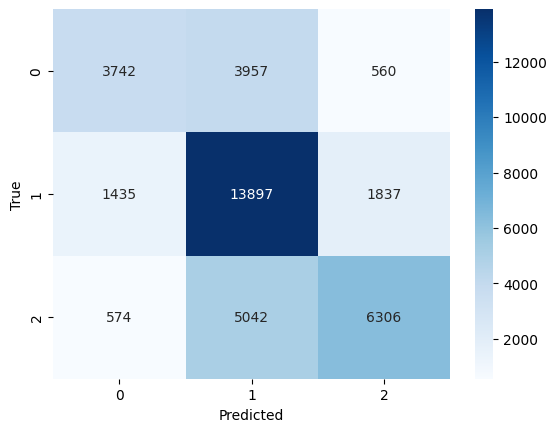

In [ ]:
# draw confusion matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()